In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Decision Tree Concepts 

> Here are notes on the key topics related to Decision Trees, Entropy, Gini Impurity, and Information Gain, suitable for quick reference in a data science project.

---

## 1. Decision Tree Introduction & Programmatic Intuition

Decision Trees are highly **intuitive** machine learning algorithms that are easy to understand.

*   **Concept:** A Decision Tree is essentially a set of **nested `if/else` conditions** or a control structure. These conditions systematically divide the dataset based on different feature criteria.
*   **Simple Example (App Recommendation):**
    Imagine recommending an app based on a user's data (Occupation, Gender).
    *   **If** `Occupation == Student`: Recommend **PUBG**.
    *   **Else If** `Gender == Female`: Recommend **Github**.
    *   **Else:** Recommend **Whatsapp**.
      
*   **[Akinator](https://en.akinator.com/) is an example of decision tree and it is too awesome don't forget to check it out.**

## 2. Decision Tree Structure and Terminology

The structure of a Decision Tree is inverted compared to typical tree structures; the root is at the top, and leaves are at the bottom.

| Term | Definition |
| :--- | :--- |
| **Root Node** | The initial, topmost node representing the first feature used to split the entire dataset. |
| **Splitting Point** | The specific criteria or threshold used to divide the data at a node (e.g., "Is Petal Length < 2?"). |
| **Decision Nodes** | The internal nodes (not the root or a leaf) where further splitting occurs. |
| **Leaves / Leaf Nodes/Terminal Nodes** | The final nodes at the bottom where the classification or prediction is made, and the tree ends. |
| **Branch / Subtree** | The pathways or segments connecting the nodes. |


![](https://miro.medium.com/v2/resize:fit:1184/1*FYEZGG-gEijSb87KuxSE_Q.png)

## 3. Geometric Intuition

Mathematically, Decision Trees partition the data space by drawing boundaries parallel to the coordinate axes.

*   **Concept:** Decision Trees use **hyperplanes** (or lines in 2D and planes in 3D) that run parallel to the feature axes to cut the coordinate system into rectangular regions called **hypercuboids**.
*   **Simple Example (2D Scatter Plot):**

![](https://lh5.googleusercontent.com/proxy/ENZgL2S7k-MXKucxeWSZ-rAcKz9UjOL224QfVoasEW5YF1pqIDYEu3mNp_cN8bYLUhpjrt6WuQSKOEYjFkKWdxbfWRoaPNoiiI6wDoeVOHH8zd3bjgtdlFCv7w)

## 4. Decision Tree High-Level Logic

The general steps for building a Decision Tree involve recursive splitting based on finding the best feature.

1.  **Start with Data:** Have a dataset with input features and an output/label column.
2.  **Find Best Feature:** Determine which feature is the most effective for dividing the data (this usually means finding the one with the highest **Information Gain** or lowest **Gini Impurity**).
3.  **Split Data:** Split the data based on the chosen best feature.
4.  **Recurse:** Repeat the process (Steps 2 and 3) on the resulting subsets until all data is classified.

## 5. Entropy

Entropy measures the **impurity or uncertainty** within a set of class labels.

*   **Concept:** More uncertainty/disorder in the class labels results in **higher entropy**. A system that is perfectly known or perfectly classified (highly ordered/pure) has low entropy.
*   **Formula (Two-Class Problem, Yes/No):**
    $$E = - (P_{\text{Yes}} \log_2 P_{\text{Yes}} + P_{\text{No}} \log_2 P_{\text{No}})$$
    (Where $P_i$ is the probability of class $i$).
*   **Range:** For a two-class problem, the minimum entropy is 0 (a perfectly pure split) and the **maximum entropy is 1** (when classes are split 50/50, $P_{\text{Yes}}=0.5, P_{\text{No}}=0.5$).
*   **Simple Example:**
    If a dataset has 5 total points, 2 are 'Yes' ($P_{\text{Yes}} = 0.4$) and 3 are 'No' ($P_{\text{No}} = 0.6$).
    $$E = - (0.4 \log_2 0.4 + 0.6 \log_2 0.6) \approx 0.97$$

## 6. Information Gain (IG)

Information Gain measures **how much the uncertainty (Entropy) decreases** when the dataset is split using a specific attribute.

*   **Concept:** IG is a metric used to **measure the quality of a split**. The goal is to find the feature that yields the **maximum Information Gain** (the largest decrease in impurity).
*   **Formula:**
    $$IG = E_{\text{Parent}} - \text{Weighted Average of } E_{\text{Children}}$$
*   **Simple Example (Calculation):**
    1.  Calculate the Entropy of the Parent Data: $E_{\text{Parent}} \approx 0.97$.
    2.  Calculate the Weighted Average Entropy of the Child Nodes resulting from the split: $\text{Weighted } E_{\text{Children}} \approx 0.69$.
    3.  Calculate IG: $0.97 - 0.69 = 0.28$.

## 7. Gini Impurity

Gini Impurity is an alternative metric to Entropy, also used to measure the purity or impurity of a split.

*   **Concept:** Gini works similarly to Entropy, aiming to quantify the purity of a node. It is often preferred because it is **computationally faster** (it uses squares instead of logarithms).
*   **Formula (Two-Class Problem, Yes/No):**
    $$G = 1 - (P_{\text{Yes}}^2 + P_{\text{No}}^2)$$
*   **Range:** Minimum Gini is 0 (pure node). Maximum Gini is **0.5** (when classes are split 50/50).
*   **Simple Example (Calculation):**
    If a dataset has $P_{\text{Yes}} = 2/5$ and $P_{\text{No}} = 3/5$.
    $$G = 1 - ( (2/5)^2 + (3/5)^2 ) = 1 - (4/25 + 9/25) \approx 0.48$$

## 8. Handling Numerical (Continuous) Features

Decision trees can handle numerical data, but the process of finding the optimal split is different from that used for categorical data.

*   **The Challenge:** Unlike categorical features (which might have 2-3 categories), a numerical feature might have hundreds of unique values. If you try to split on every unique value, you get an extremely large tree.
*   **Solution (Training Phase):** To find the best split point (threshold) for a numerical column:
    1.  **Sort the Data:** Sort the entire dataset based on the values in the numerical column.
    2.  **Iterative Splitting:** For every unique value $V_i$ in the sorted column, the algorithm creates a hypothetical split: "Is the Feature $< V_i$?".
    3.  **Calculate IG:** For *each* potential split, the algorithm calculates the Information Gain (or Gini Gain).
    4.  **Select Maximum IG:** The value $V_i$ that results in the **maximum Information Gain** is chosen as the optimal splitting point for that node.
*   **Computational Note:** This exhaustive process makes the training phase (finding the tree structure) **computationally expensive**, but once the tree is built, the testing/prediction phase remains fast.

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris= load_iris()

In [4]:
X=iris.data
y=iris.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [6]:
X_train.shape ,X_test.shape

((120, 4), (30, 4))

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
clf= DecisionTreeClassifier()

In [9]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
y_pred= clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7666666666666667

[Text(0.25, 0.9285714285714286, 'x[3] <= 0.75\ngini = 0.666\nsamples = 120\nvalue = [40, 38, 42]'),
 Text(0.125, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.375, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.499\nsamples = 80\nvalue = [0, 38, 42]'),
 Text(0.25, 0.6428571428571429, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.5, 0.6428571428571429, 'x[2] <= 4.95\ngini = 0.124\nsamples = 45\nvalue = [0, 3, 42]'),
 Text(0.25, 0.5, 'x[1] <= 2.95\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.125, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.375, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.75, 0.5, 'x[3] <= 1.7\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.625, 0.35714285714285715, 'x[0] <= 6.15\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.5, 0.21428571428571427, 'x[2] <= 5.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.375, 0.071428571428571

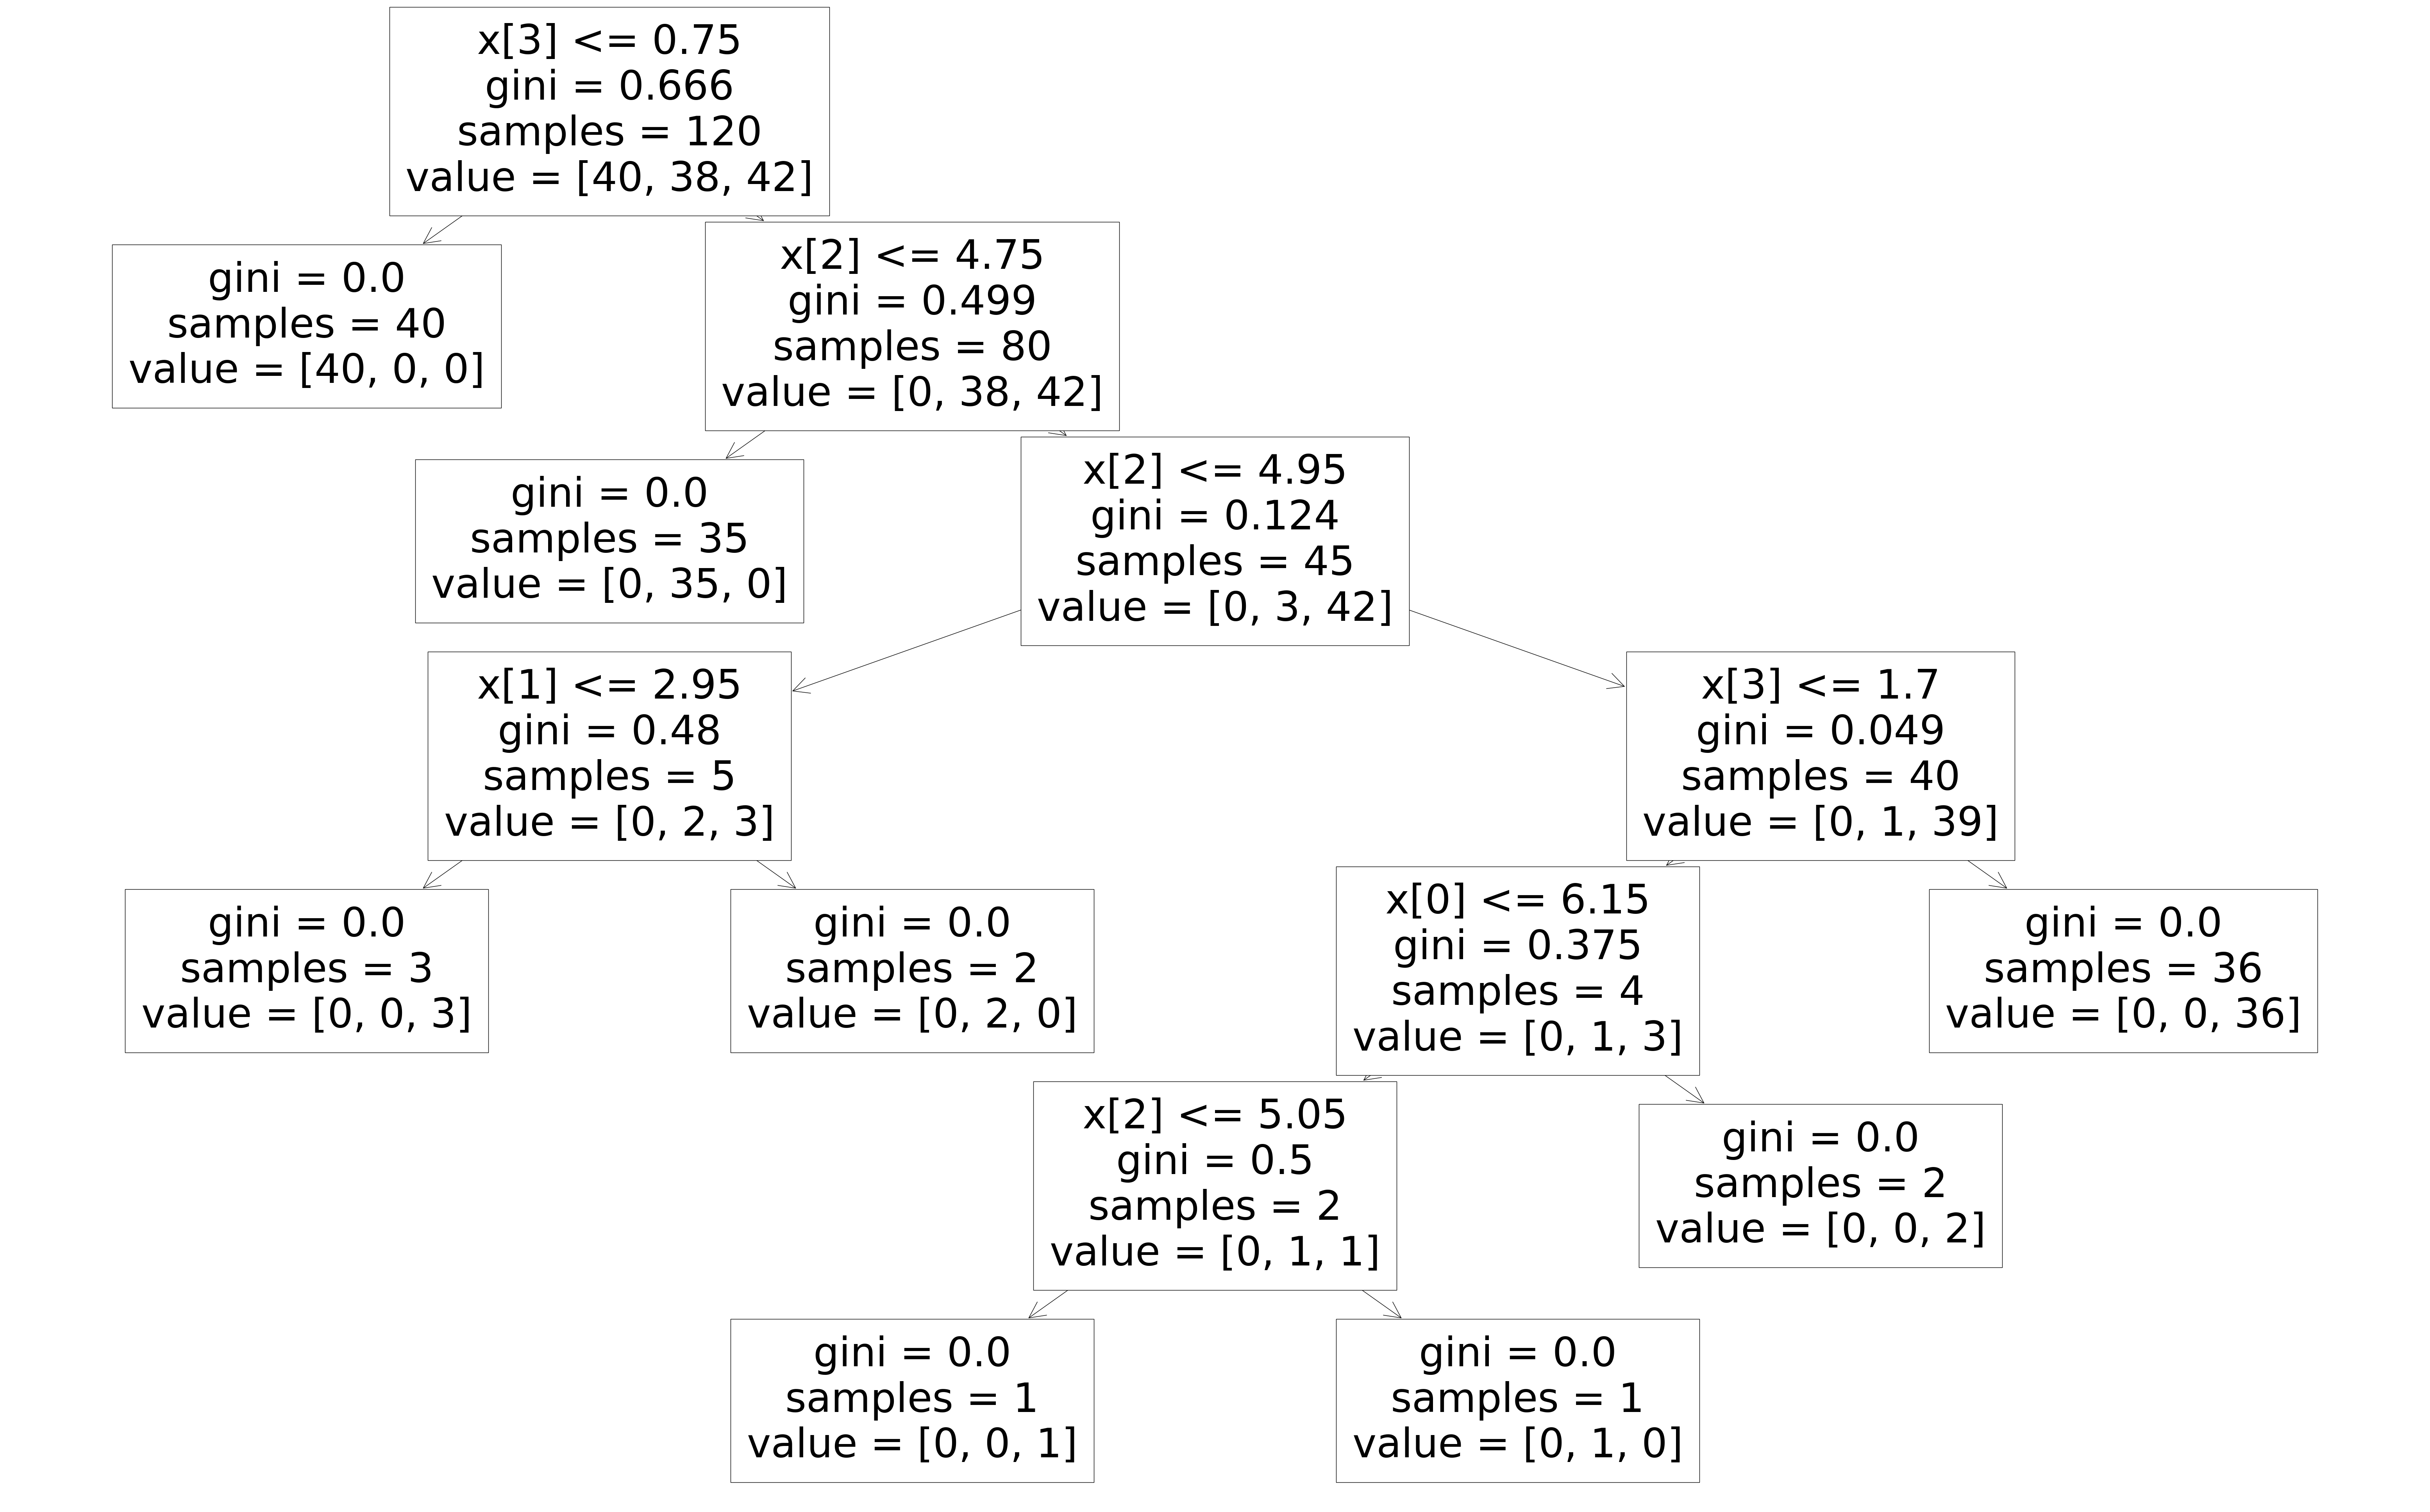

In [12]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50

plot_tree(clf)

## Decision Tree problem:

*Decision Trees are highly susceptible to **overfitting** (performing excellently on training data but poorly on unseen test data). To counteract this, Decision Trees utilize several **hyperparameters** that control the growth, size, and purity requirements of the tree.*

## Decision Tree Hyperparameters (Preventing Overfitting)

Decision Trees train by recursively splitting until they perfectly classify the data or reach a pure leaf node, which often leads to memorizing noise in the training set. Hyperparameters act as constraints to stop this excessive growth.

### 1. Max Depth (`max_depth`)

| Concept | Tuning Insight | Simple Example |
| :--- | :--- | :--- |
| Limits the maximum number of levels (splits) the tree can grow to. | **High or Unlimited** depth increases the risk of **Overfitting**. **Very Low** depth (e.g., 1) causes **Underfitting**. | If your training code specifies `max_depth = 5`, the tree will stop growing after the fifth split, regardless of the impurity left. |

### 2. Splitting Criteria (`criterion`)

This parameter determines the mathematical function used to measure the quality (purity/impurity) of a split.

| Context | Criteria Option | Notes |
| :--- | :--- | :--- |
| **Classification** | **Gini Index** (Gini Impurity) | Computationally faster (uses squares instead of logarithms) and is often the default choice. |
| **Classification** | **Entropy** | Measures uncertainty or disorder using logarithms. Both Gini and Entropy yield similar results, though Gini is typically preferred for speed. |
| **Regression** | **Mean Squared Error (MSE)** | Used to minimize the variance (error) within the nodes. MSE, MAE, or Friedman MSE are common for Regression Trees. |

### 3. Splitter (`splitter`)

| Concept | Tuning Insight | Simple Example |
| :--- | :--- | :--- |
| Determines how the split point is chosen at each node (e.g., "Feature X < 2.5"). Options are 'best' or 'random'. | **'Best'** minimizes training error but increases the chance of **Overfitting**. **'Random'** chooses splits randomly from a subset of possibilities, which helps **reduce overfitting**. | Setting `splitter = 'random'` introduces more randomness into the tree construction, making the model generalize better to unseen data. |

### 4. Min Samples Split (`min_samples_split`)

| Concept | Tuning Insight | Simple Example |
| :--- | :--- | :--- |
| The minimum number of samples (rows) a node must contain before the algorithm will attempt to split it further. | A **high value** forces the tree to stop growing early, potentially leading to **Underfitting**. A **low value** allows splits even on small groups, increasing **Overfitting**. | If `min_samples_split = 50`, a node containing 45 rows will become a leaf node, and no further decision boundaries will be created below it. |

### 5. Min Samples Leaf (`min_samples_leaf`)

| Concept | Tuning Insight | Simple Example |
| :--- | :--- | :--- |
| The minimum number of samples required to exist in *either* of the child nodes (leaves) that result from a split. | A **high value** severely restricts splitting because every split must result in two child nodes that each meet this threshold. This prevents complex patterns and promotes **Underfitting**. | If `min_samples_leaf = 100`, a node with 150 samples cannot split because it is impossible to create two child nodes both having at least 100 samples. |

### 6. Max Features (`max_features`)

| Concept | Tuning Insight | Simple Example |
| :--- | :--- | :--- |
| At any given split, this limits the number of features (columns) that the algorithm considers for finding the best split. | This parameter is crucial for **high-dimensional data** (many columns). By checking only a random subset of features, it limits the algorithm's ability to perfectly fit the training data, thereby **reducing overfitting**. | If you have 100 features and set `max_features = 10`, at every node, the algorithm randomly selects only 10 features to evaluate for the best split. |

### 7. Min Impurity Decrease (`min_impurity_decrease`)

| Concept | Tuning Insight | Simple Example |
| :--- | :--- | :--- |
| The minimum reduction in impurity (e.g., Gini, Entropy, or MSE) that must result from a split for that split to be accepted. | **High values** stop the tree growth early if the gain is not significant, causing **Underfitting**. **Low values** allow the tree to continue splitting even if the improvement is tiny, increasing **Overfitting**. | If `min_impurity_decrease = 0.01`, a potential split that only reduces impurity by 0.005 will be rejected, and the node will become a leaf. |


**below you can tune hyperparameters and see changes**

In [13]:
# =====================================
# Decision Tree Classifier (Always Multiclass)
# =====================================

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, FloatSlider, IntSlider
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# -------- Multiclass Dataset Loader ----------
def load_multiclass_dataset():
    # Always 3 classes
    X, y = make_blobs(n_features=2, centers=3, random_state=2)
    print("Dataset: Multiclass (3 Clusters)")
    return X, y

# -------- Meshgrid Drawer ----------
def draw_meshgrid(X, step):
    a = np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, step)
    b = np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, step)
    XX, YY = np.meshgrid(a, b)
    grid = np.column_stack([XX.ravel(), YY.ravel()])
    return XX, YY, grid

# -------- Main Function ----------
def run_tree_classifier(
    criterion="gini",
    splitter="best",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    min_impurity_decrease=0.0,
    mesh_step=0.05,
    random_state=42
):

    X, y = load_multiclass_dataset()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    clf = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        min_impurity_decrease=min_impurity_decrease,
        random_state=random_state
    )

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    XX, YY, grid = draw_meshgrid(X, mesh_step)
    labels = clf.predict(grid)

    plt.figure(figsize=(7, 5))
    plt.contourf(XX, YY, labels.reshape(XX.shape), cmap="rainbow", alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow", edgecolor="k")
    plt.title(f"Decision Tree Classifier (Accuracy: {acc:.3f})")
    plt.show()

    print("CONFIGURATION USED:")
    print(" criterion:", criterion)
    print(" splitter:", splitter)
    print(" max_depth:", max_depth)
    print(" min_samples_split:", min_samples_split)
    print(" min_samples_leaf:", min_samples_leaf)
    print(" max_features:", max_features)
    print(" min_impurity_decrease:", min_impurity_decrease)
    print(" Accuracy:", round(acc, 4))


# -------- UI Widgets ----------
interact(
    run_tree_classifier,
    criterion=Dropdown(options=["gini", "entropy", "log_loss"], value="gini", description="Criterion"),
    splitter=Dropdown(options=["best", "random"], value="best", description="Splitter"),
    max_depth=IntSlider(value=None, min=1, max=20, step=1, description="Max Depth"),
    min_samples_split=IntSlider(value=2, min=2, max=20, description="Min Split"),
    min_samples_leaf=IntSlider(value=1, min=1, max=20, description="Min Leaf"),
    max_features=IntSlider(value=1, min=1, max=20, description="Max Features"),
    min_impurity_decrease=FloatSlider(value=0.0, min=0.0, max=0.5, step=0.01, description="Min Impurity"),
    mesh_step=FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description="Mesh Step"),
    random_state=IntSlider(value=42, min=0, max=9999, description="Rnd State")
)


interactive(children=(Dropdown(description='Criterion', options=('gini', 'entropy', 'log_loss'), value='gini')…

<function __main__.run_tree_classifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, min_impurity_decrease=0.0, mesh_step=0.05, random_state=42)>

## Regression Trees

*Decision Trees are primarily used for classification but can be adapted for **regression problems** where the target variable is continuous (e.g., house price, temperature).*

| Topic | Explanation | Example/Intuition |
| :--- | :--- | :--- |
| **Core Function** | Regression trees divide the data based on input features, but the goal is to **minimize the residual error** (variance/MSE) within each resulting sub-region, rather than maximizing purity (Entropy/Gini). | If you are predicting exam marks based on study hours, the tree splits the hours into groups (e.g., `<3` hours, `3-6` hours, `>6` hours). |
| **Splitting Criterion** | The algorithm uses metrics like **Mean Squared Error (MSE)** to calculate the quality of a split. The best split is the one that achieves the **minimum squared error** in the resulting child nodes. | For a group of students, the MSE measures how far each student's predicted score (which is the group mean) is from their actual score. |
| **Prediction** | When a new data point falls into a specific final leaf node, the prediction for that point is the **mean (average) value** of all the training samples contained in that leaf. | If the '3-6 hours' leaf node contains 10 students whose average score was 85%, any new student who studied 5 hours is predicted to score 85%. |
| **Non-Linearity** | Regression trees are highly effective when the relationship between inputs and outputs is **non-linear** (not a straight line). | Unlike linear regression, which draws a straight line, a Regression Tree approximates the relationship using a series of horizontal and vertical steps (like a staircase). |

---


In [14]:
from pandas_datareader import data
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV

In [15]:
fch = fetch_california_housing()
df = pd.DataFrame(fch.data)

In [16]:
df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
X= fch.data
y= fch.target

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [19]:

rt = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth=5)
     
rt.fit(X_train,y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [20]:
y_pred= rt.predict(X_test)

In [21]:
r2_score(y_test,y_pred)

0.5997321244428706

In [22]:

param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':[ 'squared_error', 'friedman_mse'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [23]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)
    

In [24]:
reg.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [25]:
reg.best_score_

0.4614960798670838

In [26]:
reg.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 1.0,
 'min_samples_split': 0.25}

## Feature Importance

| Concept | Utility | Example |
| :--- | :--- | :--- |
| **Feature Importance** is a score calculated by the Decision Tree during training that indicates how useful or crucial each input column was in constructing the tree (i.e., how often it was used for successful splits). | It aids in **Feature Selection** and understanding the model. Features with low importance can potentially be removed without significantly affecting performance. | If you train a model to predict house price, and the "Number of Rooms" feature is used far more often to create effective splits than "Year Built," the "Number of Rooms" feature will have a much higher importance score. |

In [27]:
for importance,name in sorted(zip(rt.feature_importances_,df.columns),reverse=True):
    print(name,importance)

0 0.7712117162048778
5 0.12840674614889172
1 0.041620879936078194
2 0.031260721268004554
6 0.02204948028678267
4 0.002484998287179621
7 0.002096950201375844
3 0.000868507666809605


**below you can tune hyperparameters and see changes**

*if you want to see original documentation or more hyperparameter then click [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)*

In [28]:
# ===============================
# Decision Tree Regressor (Updated Hyperparameters)
# ===============================

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# -------- Regression Data ----------
def load_regression_data():
    X, y = make_regression(n_samples=300, n_features=1, noise=5)
    y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])
    return X, y

# -------- Main Function ----------
def run_tree_regressor(
    criterion="squared_error",
    splitter="best",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    min_impurity_decrease=0.0,
    random_state=42
):

    X, y = load_regression_data()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    reg = DecisionTreeRegressor(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        min_impurity_decrease=min_impurity_decrease,
        random_state=random_state
    )

    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    X_line = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)
    y_line = reg.predict(X_line)

    plt.figure(figsize=(7, 5))
    plt.scatter(X, y, color="blue", edgecolor="k")
    plt.plot(X_line, y_line, color="red", linewidth=2)
    plt.title(f"Decision Tree Regressor (MSE: {mse:.3f})")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.show()

    print("CONFIGURATION USED:")
    print(" criterion:", criterion)
    print(" splitter:", splitter)
    print(" max_depth:", max_depth)
    print(" min_samples_split:", min_samples_split)
    print(" min_samples_leaf:", min_samples_leaf)
    print(" max_features:", max_features)
    print(" min_impurity_decrease:", min_impurity_decrease)
    print(" MSE:", round(mse, 4))


# -------- UI Widgets ----------
interact(
    run_tree_regressor,
    criterion=Dropdown(options=["squared_error", "friedman_mse", "absolute_error"], value="squared_error", description="Criterion"),
    splitter=Dropdown(options=["best", "random"], value="best", description="Splitter"),
    max_depth=IntSlider(value=None, min=1, max=20, step=1, description="Max Depth"),
    min_samples_split=IntSlider(value=2, min=2, max=20, description="Min Split"),
    min_samples_leaf=IntSlider(value=1, min=1, max=20, description="Min Leaf"),
    max_features=IntSlider(value=1, min=1, max=20, description="Max Features"),
    min_impurity_decrease=FloatSlider(value=0.0, min=0.0, max=0.5, step=0.01, description="Min Impurity"),
    random_state=IntSlider(value=42, min=0, max=9999, description="Rnd State")
)


interactive(children=(Dropdown(description='Criterion', options=('squared_error', 'friedman_mse', 'absolute_er…

<function __main__.run_tree_regressor(criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, min_impurity_decrease=0.0, random_state=42)>